In [2]:
import pandas as pd                         # Importing necessary libraries

df = pd.read_csv("water_potability.csv")    # Loading the dataset

print("First 5 rows of the dataset:")       # Display the first 5 rows of the dataset
display(df.head())

print("\nDataset shape (rows, columns):")   # Show shape
print(df.shape)

print("\nDataset info:")
df.info()                

First 5 rows of the dataset:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0



Dataset shape (rows, columns):
(3276, 10)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [3]:
# Checking the number of missing values in each column
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [4]:
df.fillna(df.mean(numeric_only=True), inplace=True)  # Fill missing values with the mean of their respective columns

print("Remaining missing values after imputation:")  # Verify that all missing values are handled
print(df.isnull().sum())

Remaining missing values after imputation:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [5]:
df_features = df.drop("Potability", axis=1)                   # Drop the target column 'Potability' because we are doing unsupervised learning

print("Shape after dropping 'Potability':",df_features.shape) # Check the shape to confirm column removal

df_features.head()                                            # Preview the cleaned dataset

Shape after dropping 'Potability': (3276, 9)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


Statistical summary of the dataset:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000


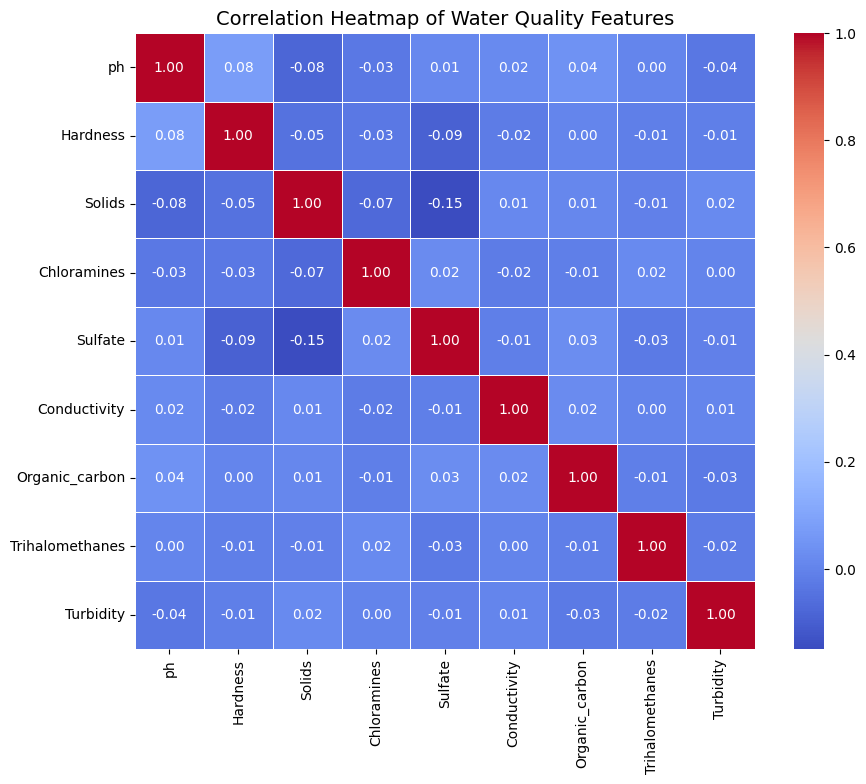

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Statistical summary of the dataset:")                                     # Summary statistics: mean, std, min, max, etc.
display(df_features.describe())

corr_matrix = df_features.corr()                                                 # Correlation matrix

plt.figure(figsize=(10, 8))                                                      # Set the plot size

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5) # Create a heatmap of the correlation matrix

plt.title("Correlation Heatmap of Water Quality Features", fontsize=14)          # Title
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()                                          # Initializing a scaler

scaled_data = scaler.fit_transform(df_features)                    # Fit and transform the features

import numpy as np 
scaled_df = pd.DataFrame(scaled_data, columns=df_features.columns) # Converting to DataFrame for readability

scaled_df.head()                                                   # Preview scaled data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-6.043133e-16,0.259195,-0.139471,0.112415,9.613574e-01,1.708954,-1.180651,1.306149,-1.286298
1,-2.289339e+00,-2.036414,-0.385987,-0.307694,3.145987e-15,2.062575,0.270597,-0.638480,0.684218
2,6.928678e-01,0.847665,-0.240047,1.360594,3.145987e-15,-0.094032,0.781117,0.001509,-1.167365
3,8.409504e-01,0.547651,0.000493,0.592008,6.395190e-01,-0.778830,1.255134,2.152874,0.848412
4,1.368569e+00,-0.464429,-0.460249,-0.363698,-6.541765e-01,-0.343939,-0.824357,-2.181599,0.138786


d:\Python\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


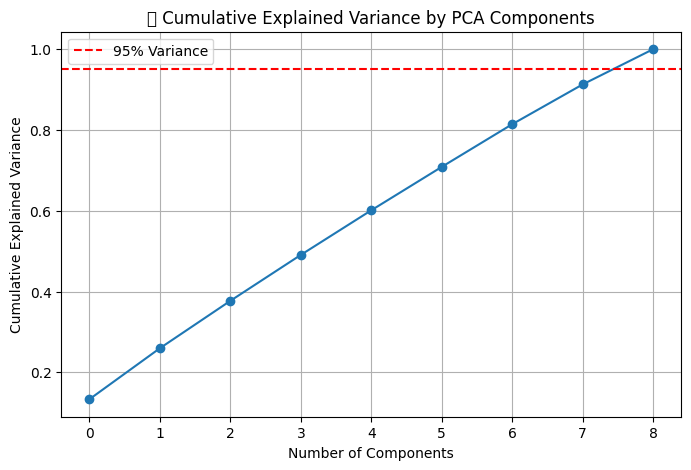

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Fit PCA without limiting components
pca = PCA()
pca.fit(scaled_df)

# Step 2: Plot explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('🔍 Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.show()

In [9]:
pca_2d = PCA(n_components=2)
reduced_2d = pca_2d.fit_transform(scaled_df)                 # Reduce to 2 components for 2D visualization

pca_df = pd.DataFrame(reduced_2d, columns=['PC1', 'PC2'])    # Convert to DataFrame for easy plotting

pca_df.head()                                                # Preview reduced data

,PC1,PC2
0,-0.621782,-0.000739
1,0.760030,-2.415799
2,-0.996212,0.922699
3,-0.821757,0.415561
4,-0.204124,0.602413


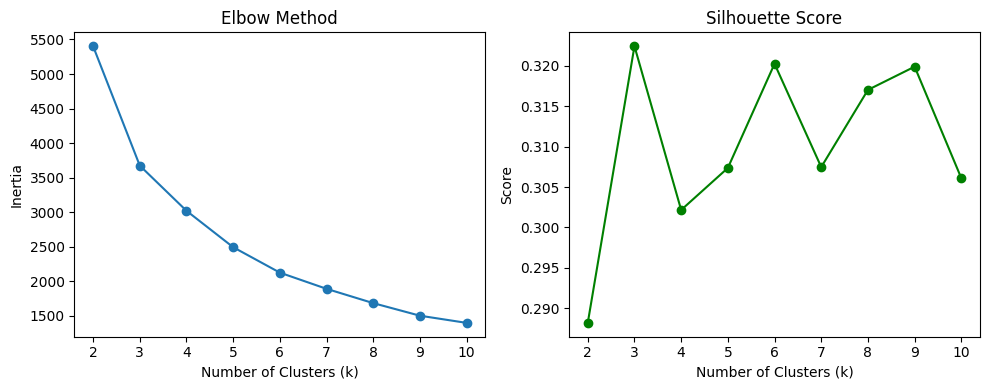

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Trying k values from 1 to 10
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_df, kmeans.labels_))

# Plot Inertia (Elbow Method)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

d:\Python\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


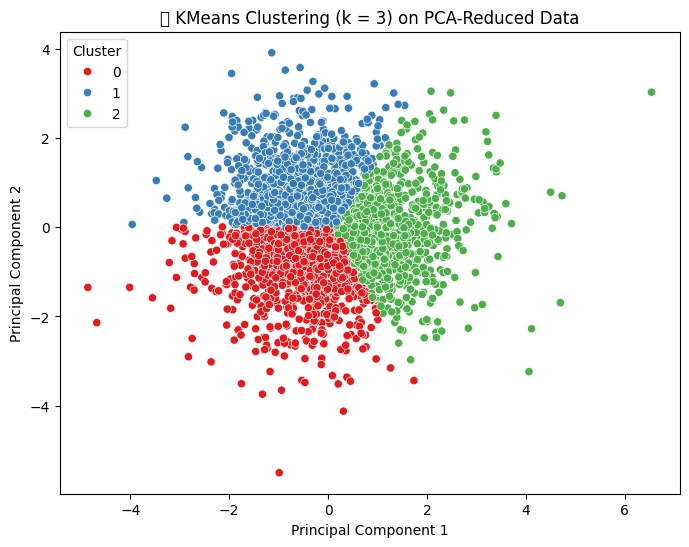

In [11]:
# Fit KMeans with optimal k
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(pca_df)

# Add cluster labels to the PCA DataFrame
pca_df['Cluster'] = cluster_labels

# Visualize the clusters in 2D PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set1', data=pca_df)
plt.title(f'🔍 KMeans Clustering (k = {optimal_k}) on PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [13]:
# Redefine the scaled data if X_scaled is not present
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)  # df_features should already be defined

In [14]:
# Add the cluster labels back to the original scaled data (for interpretation)
scaled_df = pd.DataFrame(X_scaled, columns=df_features.columns)
scaled_df['Cluster'] = cluster_labels

# Get cluster-wise mean of original (standardized) features
cluster_summary = scaled_df.groupby('Cluster').mean()
cluster_summary

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Cluster,,,,,,,,,
0,-0.323009,-0.585981,-0.336511,0.434949,0.575166,-0.112535,-0.188462,-0.015485,0.160899
1,0.604815,0.568223,-0.421065,-0.163147,0.027139,0.035795,0.253387,0.007196,-0.314430
2,-0.372218,-0.037791,0.878927,-0.283601,-0.667710,0.081108,-0.097275,0.008425,0.201265


In [15]:
# Map cluster labels to human-readable risk categories and reasons
risk_mapping = {
    0: {
        'Risk_Label': 'Safe',
        'Risk_Reason': 'This cluster shows low levels of dissolved solids and hardness, along with balanced chloramine and sulfate concentrations — all of which are key indicators of potable and treated water.'
    },
    1: {
        'Risk_Label': 'Moderate Risk',
        'Risk_Reason': 'Water in this cluster tends to be hard (high hardness), with slightly lower chloramine levels. While it may not be harmful, it indicates less effective disinfection and potential scaling issues.'
    },
    2: {
        'Risk_Label': 'Unsafe',
        'Risk_Reason': 'This group has very high total dissolved solids and turbidity, coupled with low sulfate concentration. These characteristics point to contamination and poor water treatment, making it likely unsafe for consumption.'
    }
}
# Apply elaborated risk mapping to the DataFrame
scaled_df['Risk_Label'] = scaled_df['Cluster'].map(lambda x: risk_mapping[x]['Risk_Label'])
scaled_df['Risk_Reason'] = scaled_df['Cluster'].map(lambda x: risk_mapping[x]['Risk_Reason'])

# Preview DataFrame
scaled_df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Cluster,Risk_Label,Risk_Reason
0,-6.043133e-16,0.259195,-0.139471,0.112415,9.613574e-01,1.708954,-1.180651,1.306149,-1.286298,1,Moderate Risk,Water in this cluster tends to be hard (high h...
1,-2.289339e+00,-2.036414,-0.385987,-0.307694,3.145987e-15,2.062575,0.270597,-0.638480,0.684218,0,Safe,This cluster shows low levels of dissolved sol...
2,6.928678e-01,0.847665,-0.240047,1.360594,3.145987e-15,-0.094032,0.781117,0.001509,-1.167365,1,Moderate Risk,Water in this cluster tends to be hard (high h...
3,8.409504e-01,0.547651,0.000493,0.592008,6.395190e-01,-0.778830,1.255134,2.152874,0.848412,1,Moderate Risk,Water in this cluster tends to be hard (high h...
4,1.368569e+00,-0.464429,-0.460249,-0.363698,-6.541765e-01,-0.343939,-0.824357,-2.181599,0.138786,1,Moderate Risk,Water in this cluster tends to be hard (high h...


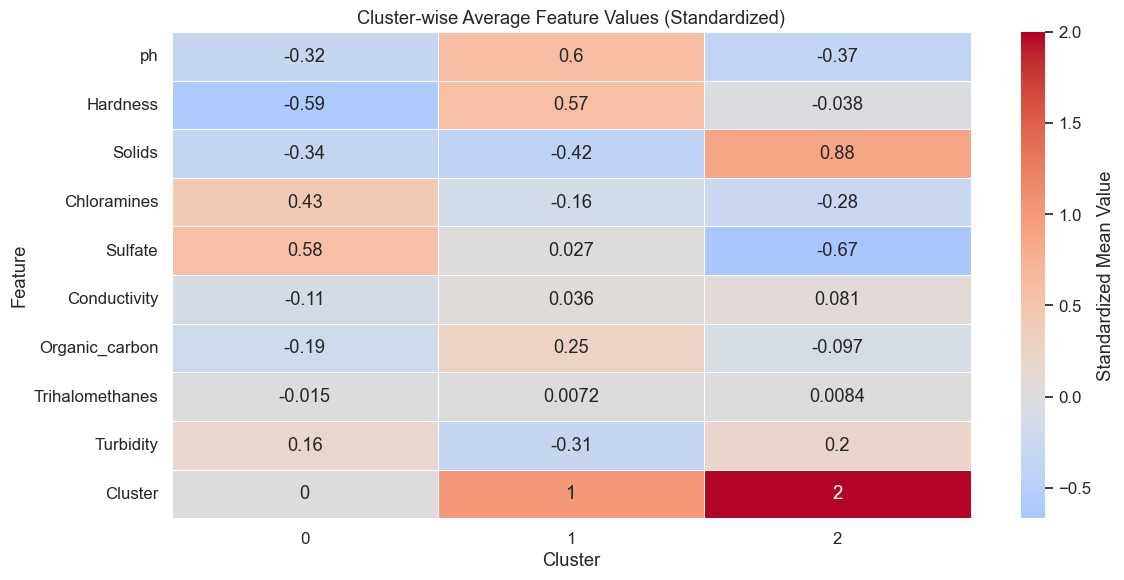

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Just to be safe: drop any non-numeric columns (like Risk_Label or Risk_Reason if present)
numeric_cols = scaled_df.select_dtypes(include=['number'])

# Group by Cluster and compute mean
cluster_means = numeric_cols.groupby(scaled_df['Cluster']).mean()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.set(font_scale=1.1)

sns.heatmap(cluster_means.T,  # Transpose so features are on y-axis
            annot=True,
            cmap='coolwarm',
            center=0,
            linewidths=0.5,
            cbar_kws={'label': 'Standardized Mean Value'})

plt.title("Cluster-wise Average Feature Values (Standardized)")
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [18]:
# Copying the DataFrame (standardized + original format)
final_df = scaled_df.copy()

# Adding cluster labels
final_df['Cluster'] = cluster_labels

# Defining the risk labels and descriptions
risk_labels = {
    0: ("Safe", "Low levels of solids and balanced chloramines/sulfate, suggesting clean and soft water"),
    1: ("Moderate Risk", "Higher hardness and turbidity with low solids; moderately safe but can stress appliances"),
    2: ("High Risk", "Very high solids with lower disinfectant levels; indicates possible contamination or poor treatment")
}

# Mapping risk label and reason to each row
final_df['Risk_Label'] = final_df['Cluster'].map(lambda x: risk_labels[x][0])
final_df['Risk_Reason'] = final_df['Cluster'].map(lambda x: risk_labels[x][1])

# Saveing as CSV
final_df.to_csv('water_quality_clustered.csv', index=False)

print("Final dataset saved as 'water_quality_clustered.csv'")


Final dataset saved as 'water_quality_clustered.csv'


In [22]:
import pkg_resources
required_libs = [
    'pandas', 'numpy', 'matplotlib', 'seaborn',
    'scikit-learn', 'ipykernel', 'jupyter'
]
installed_packages = {pkg.key: pkg.version for pkg in pkg_resources.working_set}
with open("requirements.txt", "w") as f:
    for lib in required_libs:
        if lib in installed_packages:
            f.write(f"{lib}=={installed_packages[lib]}\n")

print("requirements.txt created!")

requirements.txt created!


C:\Users\Ananya\AppData\Local\Temp\ipykernel_25780\1719917624.py:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
